In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,median_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r'C:\Users\Abd AL-Rahman\Desktop\Amit Learning Content\Machine Learning\Assignments\Machine learning\Assignment 2\archive\CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cols=df.select_dtypes(include='object').columns.tolist()
for col in cols:
    print(f'for feature {col}:\n')
    print(f'Unique values: {df[col].unique()}')
    print('\n')
    print(f'Number of Unique values: {len(df[col].unique())}')
    print('='*30)
    

for feature CarName:

Unique values: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century

In [6]:
def carmodel(x):
    lis=x.split()
    if len(lis)>1:
        model=(' '.join(lis[1:]))
        return model 
    else:
        model='Unavaliable'
        return model
    
    
        

In [7]:
df['CarModel']=df['CarName'].apply(lambda x: carmodel(x))
df['CarName']=df['CarName'].apply(lambda x: x.split()[0])

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [9]:
df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
cols=['CarName','CarModel']
for col in cols:
    print(f'for feature {col}:\n')
    print(f'Unique values: {df[col].unique()}')
    print('\n')
    print(f'Number of Unique values: {len(df[col].unique())}')
    print('='*30)

for feature CarName:

Unique values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Number of Unique values: 28
for feature CarModel:

Unique values: ['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max' 'D-Max V-Cross' 'xj'
 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc' 'rx-7 gs'
 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'sk

In [12]:
replacements=[('maxda','mazda'),('vokswagen','volkswagen'),('vw','volkswagen'),('porcshce','porsche'),('toyouta','toyota')]
for item in replacements:
    df['CarName'].replace(item[0],item[1],inplace=True)


In [13]:
df['CarName']=df['CarName'].apply(lambda x: x.lower())

In [14]:
cols=['CarName','CarModel']
for col in cols:
    print(f'for feature {col}:\n')
    print(f'Unique values: {df[col].unique()}')
    print('\n')
    print(f'Number of Unique values: {len(df[col].unique())}')
    print('='*30)

for feature CarName:

Unique values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Number of Unique values: 22
for feature CarModel:

Unique values: ['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max' 'D-Max V-Cross' 'xj'
 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc' 'rx-7 gs'
 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'c

In [15]:
import re

In [16]:
df['CarModel']=df['CarModel'].apply(lambda x: re.sub('\s+|\(.*\)','',x).lower())

In [17]:
cols=['CarName','CarModel']
for col in cols:
    print(f'for feature {col}:\n')
    print(f'Unique values: {df[col].unique()}')
    print('\n')
    print(f'Number of Unique values: {len(df[col].unique())}')
    print('='*30)

for feature CarName:

Unique values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Number of Unique values: 22
for feature CarModel:

Unique values: ['giulia' 'stelvio' 'quadrifoglio' '100ls' 'fox' '5000' '4000' '5000s'
 '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'montecarlo' 'vega2300'
 'rampage' 'challengerse' 'd200' 'monaco' 'colthardtop' 'colt'
 'coronetcustom' 'dartcustom' 'civic' 'civiccvcc' 'accordcvcc' 'accordlx'
 'civic1500gl' 'accord' 'civic1300' 'prelude' 'mu-x' 'd-max'
 'd-maxv-cross' 'xj' 'xf' 'xk' 'rx3' 'glcdeluxe' 'rx2coupe' 'rx-4' '626'
 'glc' 'rx-7gs' 'glc4' 'glccustoml' 'glccustom' 'electra225custom'
 'centuryluxus' 'century' 'skyhawk' 'opelisuzudeluxe' 'skylark'
 'centuryspecial' 'regalsportcoupe' 'cougar' 'mirage' 'lancer' 'outlander'
 'g4' 'mirageg4' 'montero' 'pajero' 'versa' 'gt-r' 'rogue' 'latio' 'ti

In [18]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,quadrifoglio
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100ls
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [19]:
from word2number import w2n
df['doornumber']=df['doornumber'].apply(lambda x: w2n.word_to_num(x))
df['cylindernumber']=df['cylindernumber'].apply(lambda x: w2n.word_to_num(x))
print(f"unique values for cylinders: {df['cylindernumber'].unique()}")
print(f"unique values for doors: {df['doornumber'].unique()}")

unique values for cylinders: [ 4  6  5  3 12  2  8]
unique values for doors: [2 4]


In [20]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarModel
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,quadrifoglio
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100ls
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [22]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [23]:
df.groupby('symboling')['price'].mean()

symboling
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64

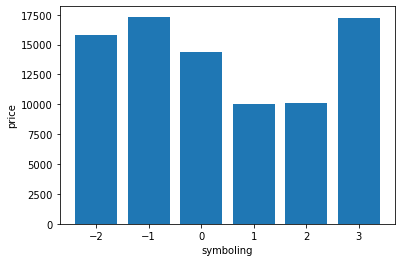

In [24]:
x=df.groupby('symboling')['price'].mean().index.tolist()
y=df.groupby('symboling')['price'].mean().values.tolist()
plt.bar(x,y)
plt.xlabel('symboling')
plt.ylabel('price')
plt.show();

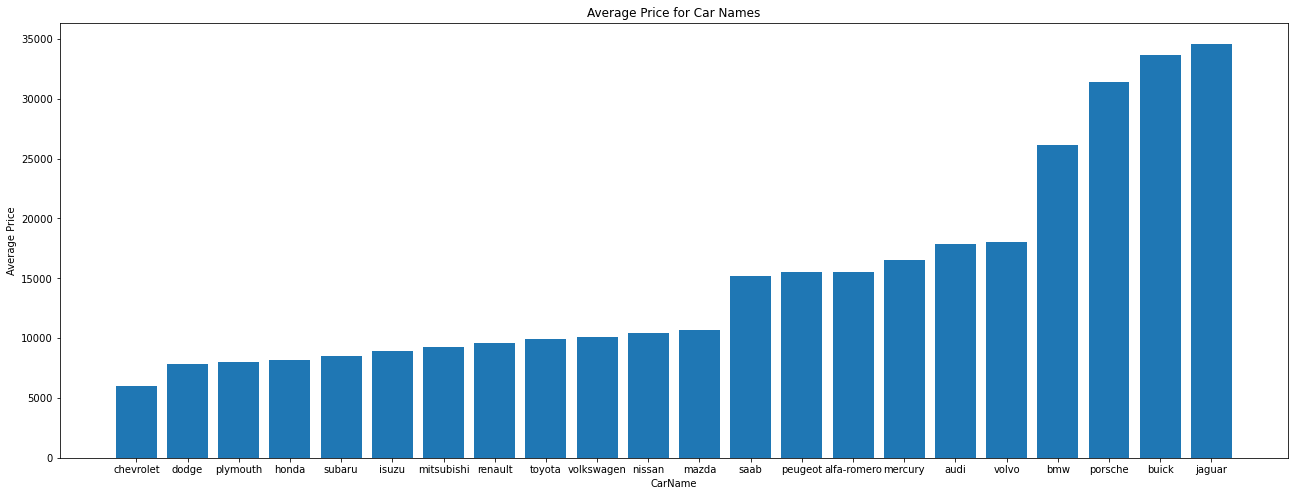

In [25]:
plt.figure(figsize=(22,8))
x=df.groupby('CarName')['price'].mean().sort_values(ascending=True).index.tolist()[:23]
y=df.groupby('CarName')['price'].mean().sort_values(ascending=True).values.tolist()[:23]
plt.bar(x,y)
plt.xlabel('CarName')
plt.ylabel('Average Price')
plt.title('Average Price for Car Names')
plt.show();

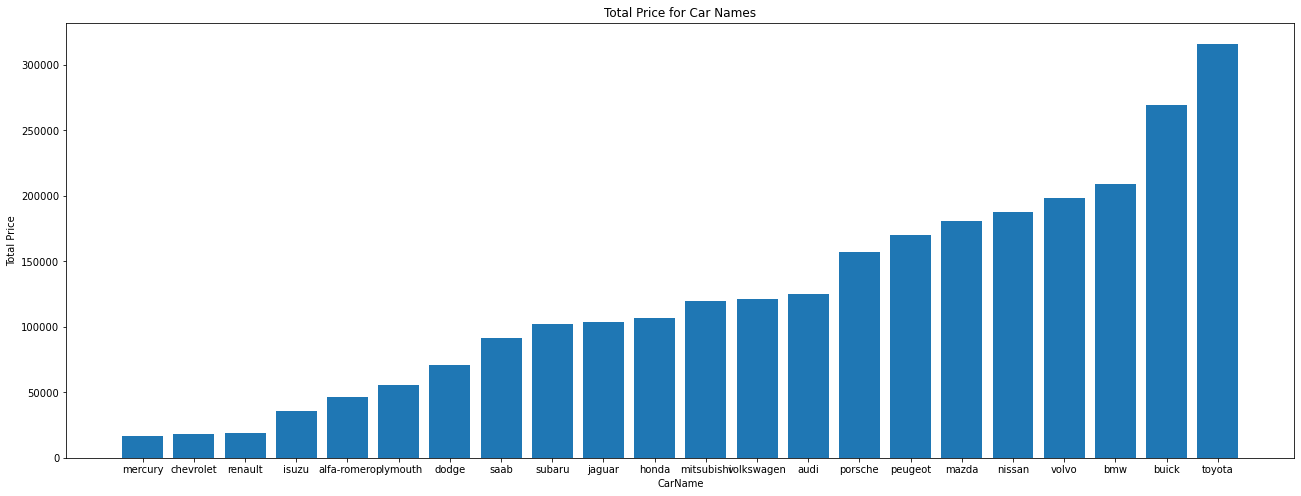

In [26]:
plt.figure(figsize=(22,8))
x=df.groupby('CarName')['price'].sum().sort_values(ascending=True).index.tolist()[:23]
y=df.groupby('CarName')['price'].sum().sort_values(ascending=True).values.tolist()[:23]
plt.bar(x,y)
plt.xlabel('CarName')
plt.ylabel('Total Price')
plt.title('Total Price for Car Names')
plt.show();

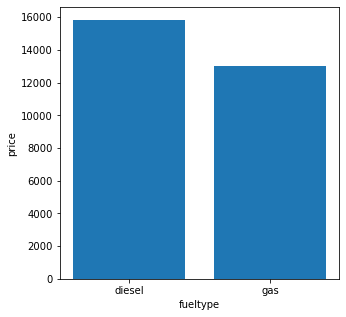

In [27]:
plt.figure(figsize=(5,5))
x=df.groupby('fueltype')['price'].mean().index
y=df.groupby('fueltype')['price'].mean().values
plt.bar(x,y)
plt.xlabel('fueltype')
plt.ylabel('price')
plt.show();

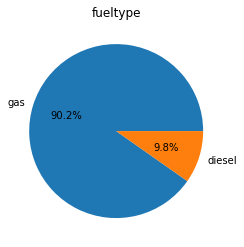

In [28]:
plt.pie(df['fueltype'].value_counts(),labels=df['fueltype'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('fueltype')
plt.show()

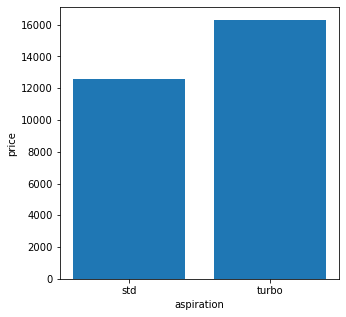

In [29]:
plt.figure(figsize=(5,5))
x=df.groupby('aspiration')['price'].mean().index
y=df.groupby('aspiration')['price'].mean().values
plt.bar(x,y)
plt.xlabel('aspiration')
plt.ylabel('price')
plt.show();

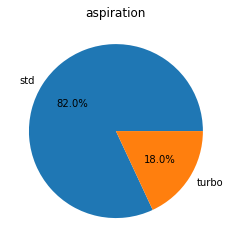

In [30]:
plt.pie(df['aspiration'].value_counts(),labels=df['aspiration'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('aspiration')
plt.show()

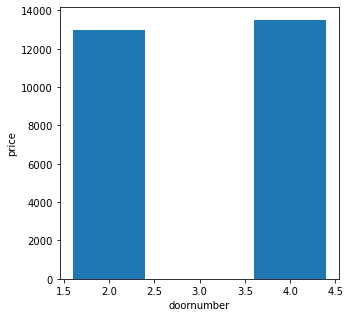

In [31]:
plt.figure(figsize=(5,5))
x=df.groupby('doornumber')['price'].mean().index
y=df.groupby('doornumber')['price'].mean().values
plt.bar(x,y)
plt.xlabel('doornumber')
plt.ylabel('price')
plt.show();

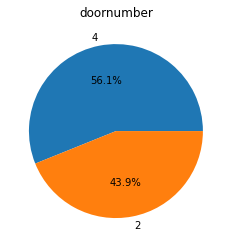

In [32]:
plt.pie(df['doornumber'].value_counts(),labels=df['doornumber'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('doornumber')
plt.show()

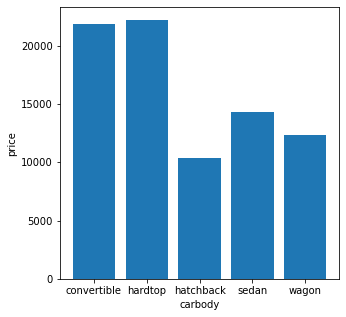

In [33]:
plt.figure(figsize=(5,5))
x=df.groupby('carbody')['price'].mean().index
y=df.groupby('carbody')['price'].mean().values
plt.bar(x,y)
plt.xlabel('carbody')
plt.ylabel('price')
plt.show();

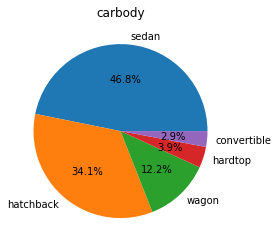

In [34]:
plt.pie(df['carbody'].value_counts(),labels=df['carbody'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('carbody')
plt.show()

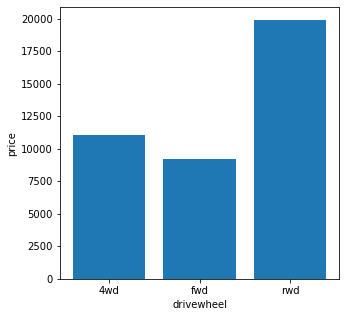

In [35]:
plt.figure(figsize=(5,5))
x=df.groupby('drivewheel')['price'].mean().index
y=df.groupby('drivewheel')['price'].mean().values
plt.bar(x,y)
plt.xlabel('drivewheel')
plt.ylabel('price')
plt.show();

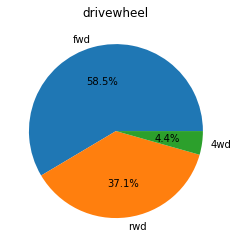

In [36]:
plt.pie(df['drivewheel'].value_counts(),labels=df['drivewheel'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('drivewheel')
plt.show()

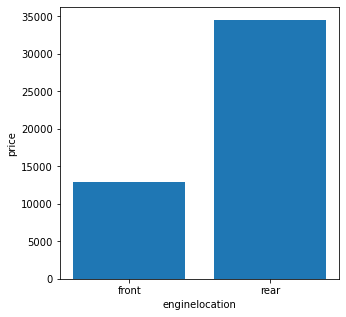

In [37]:
plt.figure(figsize=(5,5))
x=df.groupby('enginelocation')['price'].mean().index
y=df.groupby('enginelocation')['price'].mean().values
plt.bar(x,y)
plt.xlabel('enginelocation')
plt.ylabel('price')
plt.show();

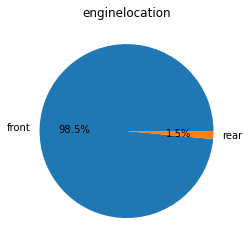

In [38]:
plt.pie(df['enginelocation'].value_counts(),labels=df['enginelocation'].value_counts().index.tolist(),autopct='%1.1f%%')
plt.title('enginelocation')
plt.show()

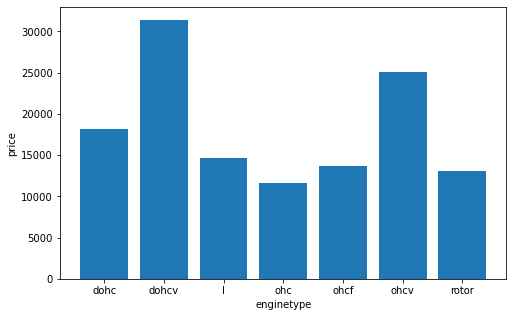

In [39]:
plt.figure(figsize=(8,5))
x=df.groupby('enginetype')['price'].mean().index
y=df.groupby('enginetype')['price'].mean().values
plt.bar(x,y)
plt.xlabel('enginetype')
plt.ylabel('price')
plt.show();

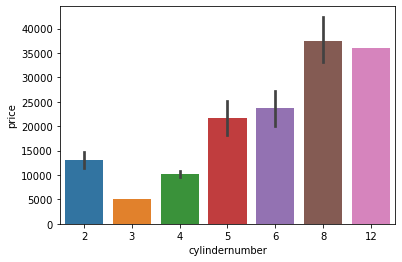

In [40]:
sns.barplot(x='cylindernumber',y='price',data=df);

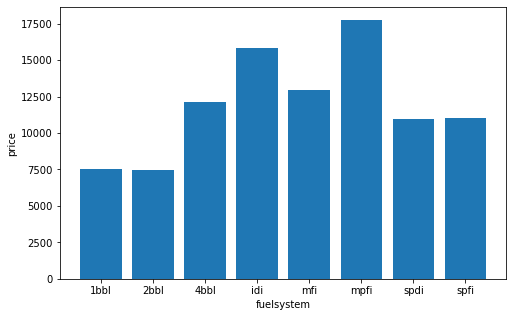

In [41]:
plt.figure(figsize=(8,5))
x=df.groupby('fuelsystem')['price'].mean().index
y=df.groupby('fuelsystem')['price'].mean().values
plt.bar(x,y)
plt.xlabel('fuelsystem')
plt.ylabel('price')
plt.show();

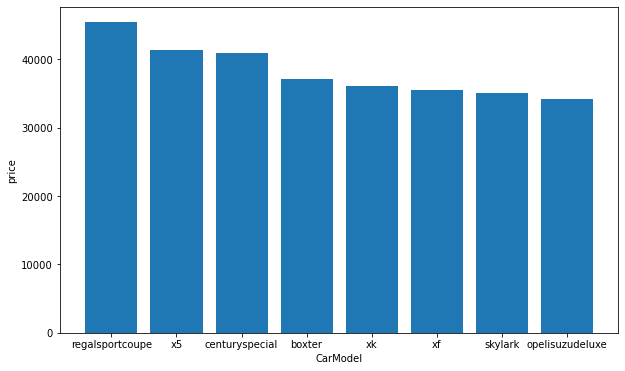

In [42]:
plt.figure(figsize=(10,6))
x=df.groupby('CarModel')['price'].mean().sort_values(ascending=False)[:8].index
y=df.groupby('CarModel')['price'].mean().sort_values(ascending=False)[:8].values
plt.bar(x,y)
plt.xlabel('CarModel')
plt.ylabel('price')
plt.show();

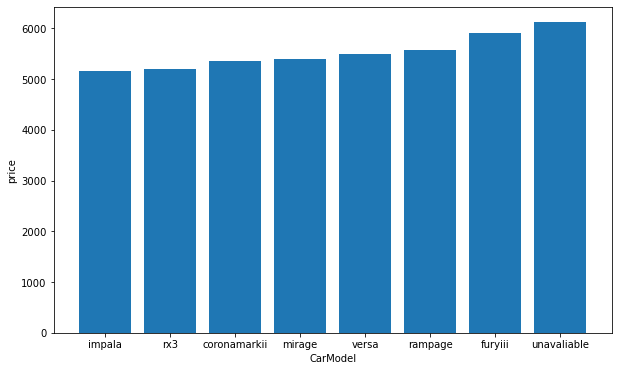

In [43]:
plt.figure(figsize=(10,6))
x=df.groupby('CarModel')['price'].mean().sort_values(ascending=True)[:8].index
y=df.groupby('CarModel')['price'].mean().sort_values(ascending=True)[:8].values
plt.bar(x,y)
plt.xlabel('CarModel')
plt.ylabel('price')
plt.show();

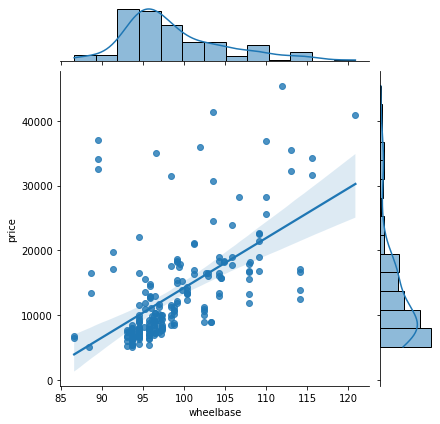

In [44]:
sns.jointplot(x='wheelbase',y='price',data=df,kind='reg')

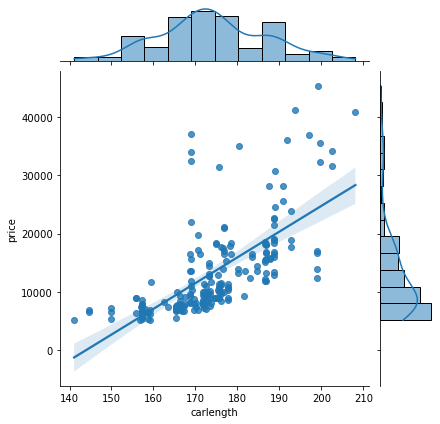

In [45]:
sns.jointplot(x='carlength',y='price',data=df,kind='reg')

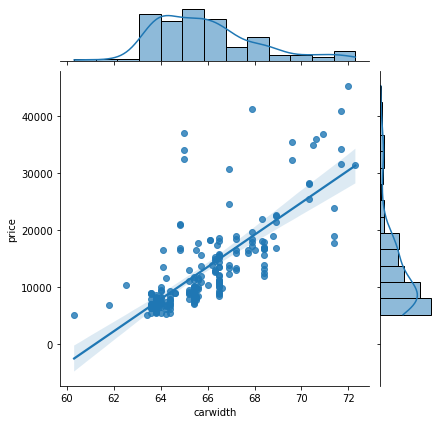

In [46]:
sns.jointplot(x='carwidth',y='price',data=df,kind='reg')

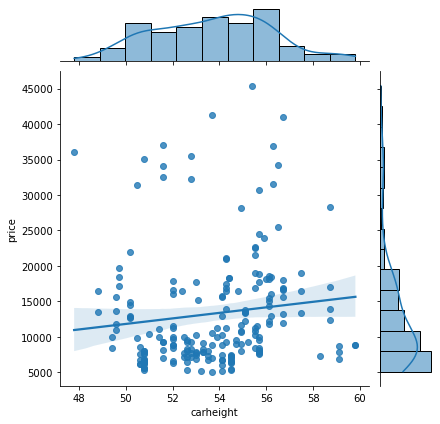

In [47]:
sns.jointplot(x='carheight',y='price',data=df,kind='reg')

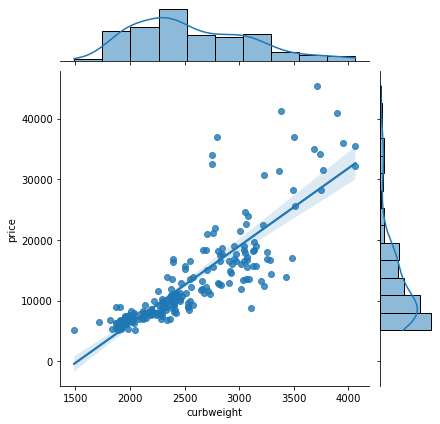

In [48]:
sns.jointplot(x='curbweight',y='price',data=df,kind='reg')

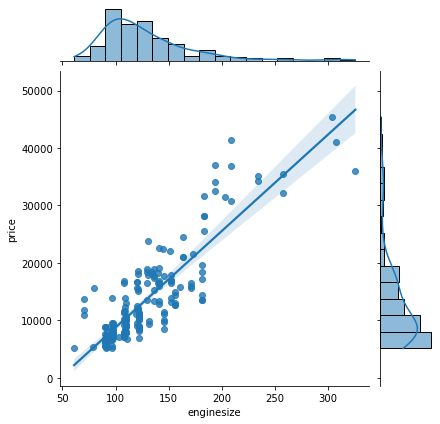

In [49]:
sns.jointplot(x='enginesize',y='price',data=df,kind='reg')

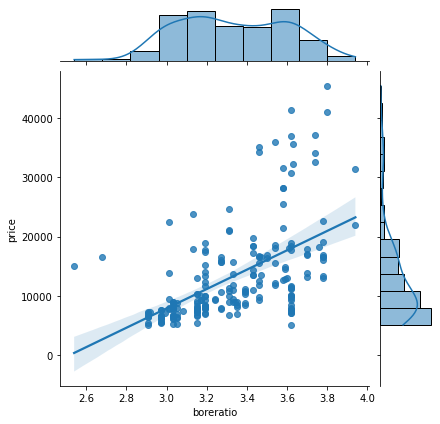

In [50]:
sns.jointplot(x='boreratio',y='price',data=df,kind='reg')

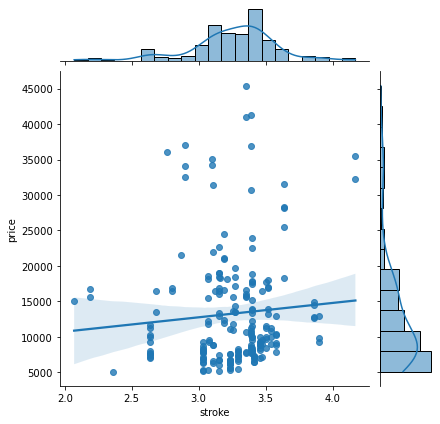

In [51]:
sns.jointplot(x='stroke',y='price',data=df,kind='reg')

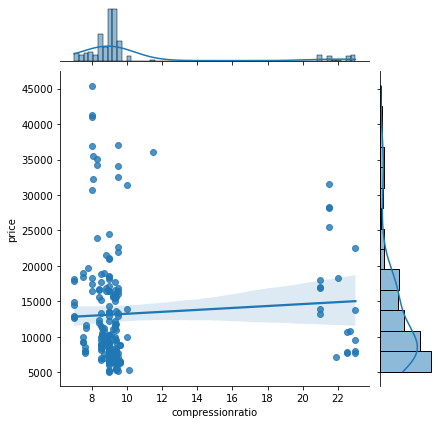

In [52]:
sns.jointplot(x='compressionratio',y='price',data=df,kind='reg')

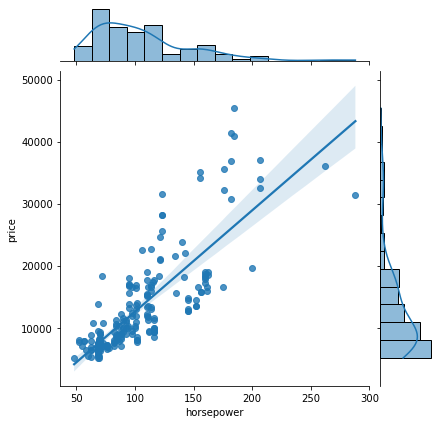

In [53]:
sns.jointplot(x='horsepower',y='price',data=df,kind='reg')

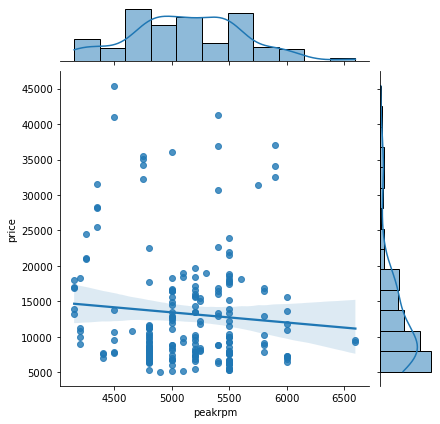

In [54]:
sns.jointplot(x='peakrpm',y='price',data=df,kind='reg')

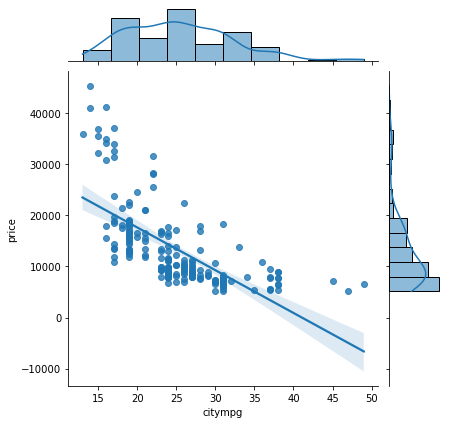

In [55]:
sns.jointplot(x='citympg',y='price',data=df,kind='reg')

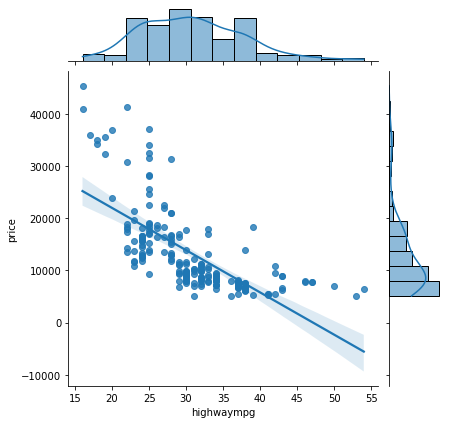

In [56]:
sns.jointplot(x='highwaympg',y='price',data=df,kind='reg')

<AxesSubplot:xlabel='price', ylabel='Density'>

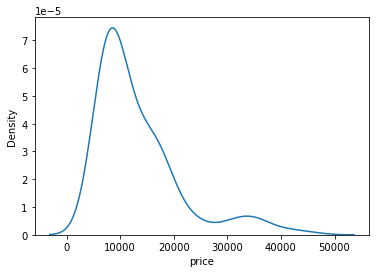

In [57]:
sns.kdeplot(x='price',data=df)

<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

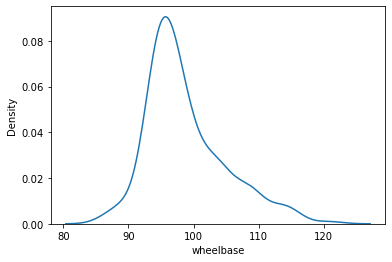

In [58]:
sns.kdeplot(x='wheelbase',data=df)

<AxesSubplot:xlabel='carlength', ylabel='Density'>

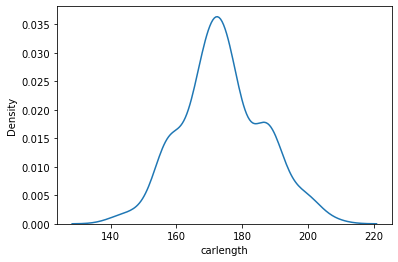

In [59]:
sns.kdeplot(x='carlength',data=df)

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

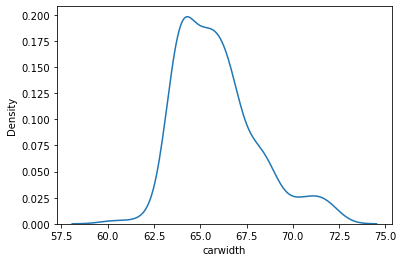

In [60]:
sns.kdeplot(x='carwidth',data=df)

<AxesSubplot:xlabel='carheight', ylabel='Density'>

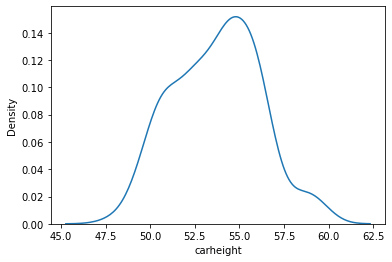

In [61]:
sns.kdeplot(x='carheight',data=df)

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

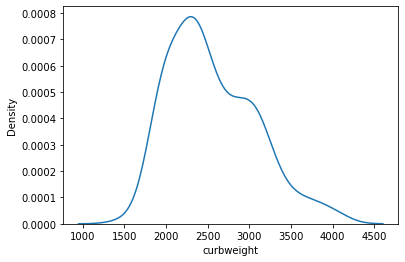

In [62]:
sns.kdeplot(x='curbweight',data=df)

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

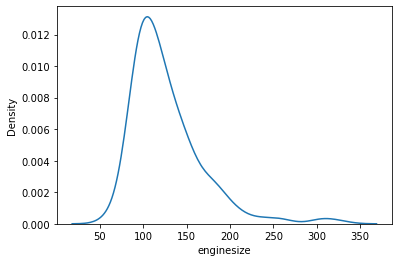

In [63]:
sns.kdeplot(x='enginesize',data=df)

<AxesSubplot:xlabel='boreratio', ylabel='Density'>

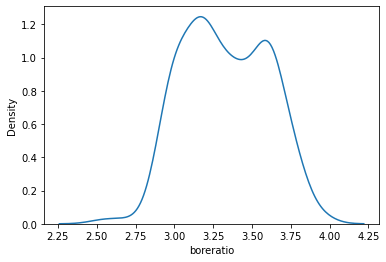

In [64]:
sns.kdeplot(x='boreratio',data=df)

<AxesSubplot:xlabel='stroke', ylabel='Density'>

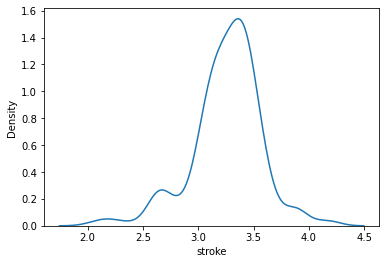

In [65]:
sns.kdeplot(x='stroke',data=df)

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

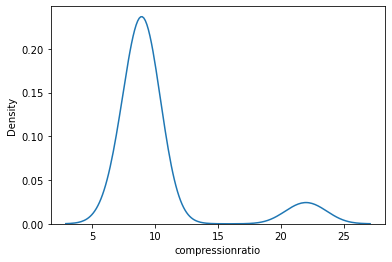

In [66]:
sns.kdeplot(x='compressionratio',data=df)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

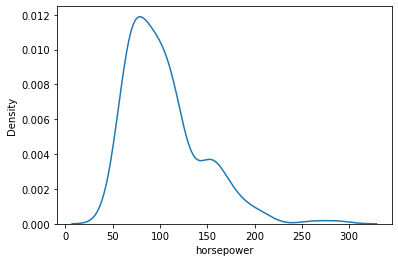

In [67]:
sns.kdeplot(x='horsepower',data=df)

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

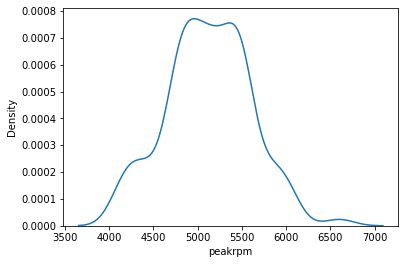

In [68]:
sns.kdeplot(x='peakrpm',data=df)

<AxesSubplot:xlabel='citympg', ylabel='Density'>

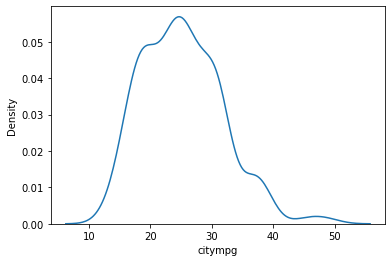

In [69]:
sns.kdeplot(x='citympg',data=df)

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

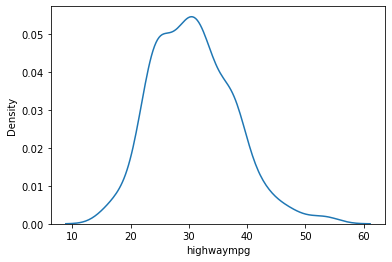

In [70]:
sns.kdeplot(x='highwaympg',data=df)

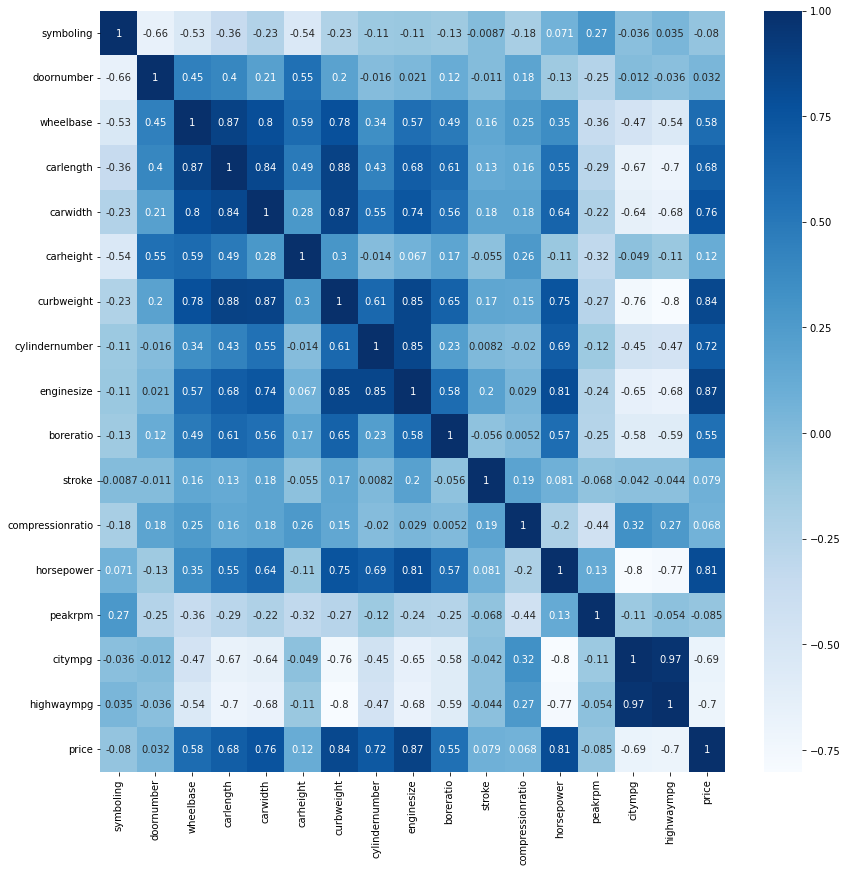

In [71]:
plt.figure(figsize=(14,14))
sns.heatmap(data=df.select_dtypes(include=np.number).corr(),annot=True,cmap='Blues');

In [72]:
df.select_dtypes(include=np.number).corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


In [24]:
df.drop(['symboling','doornumber','carheight','stroke','compressionratio','peakrpm'],axis=1,inplace=True)
df.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarModel
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27,13495.0,giulia
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,21,27,16500.0,stelvio
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,19,26,16500.0,quadrifoglio
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,24,30,13950.0,100ls
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,18,22,17450.0,100ls


In [25]:
df.shape

(205, 20)

In [26]:
from scipy.stats import f_oneway

In [27]:
categorical_columns=df.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    list_of_obj=df.groupby(col)['price'].apply(list)
    P_value = f_oneway(*list_of_obj)
    print(f'P-Value for {col} with price is: ', P_value[1])
    print('='*30)

P-Value for CarName with price is:  3.6462600814846445e-53
P-Value for fueltype with price is:  0.13153563336537924
P-Value for aspiration with price is:  0.010700300833183433
P-Value for carbody with price is:  5.031712258477608e-06
P-Value for drivewheel with price is:  6.632887281209634e-24
P-Value for enginelocation with price is:  1.993019639057392e-06
P-Value for enginetype with price is:  4.692664568743044e-09
P-Value for fuelsystem with price is:  2.9903859089321575e-16
P-Value for CarModel with price is:  4.885990948890012e-19


In [28]:
df.drop(['fueltype','aspiration','fuelsystem','enginelocation'],axis=1,inplace=True)
df.head()

,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarModel
0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,3.47,111,21,27,13495.0,giulia
1,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,3.47,111,21,27,16500.0,stelvio
2,alfa-romero,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,6,152,2.68,154,19,26,16500.0,quadrifoglio
3,audi,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,3.19,102,24,30,13950.0,100ls
4,audi,sedan,4wd,99.4,176.6,66.4,2824,ohc,5,136,3.19,115,18,22,17450.0,100ls


In [29]:
label_encoder = preprocessing.LabelEncoder()
cols_to_be_encoded=df.select_dtypes(include='object').columns.tolist()
for col in cols_to_be_encoded:
    df[col+'_'+'Enc']=label_encoder.fit_transform(df[col])

In [30]:
df.head()

,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarModel,CarName_Enc,carbody_Enc,drivewheel_Enc,enginetype_Enc,CarModel_Enc
0,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,3.47,111,21,27,13495.0,giulia,0,0,2,0,72
1,alfa-romero,convertible,rwd,88.6,168.8,64.1,2548,dohc,4,130,3.47,111,21,27,16500.0,stelvio,0,0,2,0,118
2,alfa-romero,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,6,152,2.68,154,19,26,16500.0,quadrifoglio,0,2,2,5,102
3,audi,sedan,fwd,99.8,176.6,66.2,2337,ohc,4,109,3.19,102,24,30,13950.0,100ls,1,3,1,3,0
4,audi,sedan,4wd,99.4,176.6,66.4,2824,ohc,5,136,3.19,115,18,22,17450.0,100ls,1,3,0,3,0


In [31]:
columns_to_drop=df.select_dtypes(include='object').columns.tolist()
columns_to_drop.append('price')
columns_to_drop

['CarName', 'carbody', 'drivewheel', 'enginetype', 'CarModel', 'price']

In [32]:
X=df.drop(columns_to_drop,axis=1)
Y=df['price']

In [33]:
X

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,CarName_Enc,carbody_Enc,drivewheel_Enc,enginetype_Enc,CarModel_Enc
0,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,0,0,2,0,72
1,88.6,168.8,64.1,2548,4,130,3.47,111,21,27,0,0,2,0,118
2,94.5,171.2,65.5,2823,6,152,2.68,154,19,26,0,2,2,5,102
3,99.8,176.6,66.2,2337,4,109,3.19,102,24,30,1,3,1,3,0
4,99.4,176.6,66.4,2824,5,136,3.19,115,18,22,1,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114,23,28,21,3,2,3,4
201,109.1,188.8,68.8,3049,4,141,3.78,160,19,25,21,3,2,3,3
202,109.1,188.8,68.9,3012,6,173,3.58,134,18,23,21,3,2,5,5
203,109.1,188.8,68.9,3217,6,145,3.01,106,26,27,21,3,2,3,7


In [34]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
poly_features=PolynomialFeatures(degree=1,include_bias=False)
X_train_poly=poly_features.fit_transform(X_train)
linear_model=LinearRegression()
linear_model.fit(X_train_poly,Y_train)
X_test_poly = poly_features.transform(X_test)
Y_pred = linear_model.predict(X_test_poly)
print(f'Training score: {linear_model.score(X_train_poly,Y_train)}')
print(f'Testing score: {linear_model.score(X_test_poly,Y_test)}')
print(f'MSE: {mean_squared_error(Y_test,Y_pred)}')
print(f'MAE : {mean_absolute_error(Y_test,Y_pred)}')
print(f'Median absolute error: {median_absolute_error(Y_test,Y_pred)}')
print(f'R2 score: {r2_score(Y_test,Y_pred)}')


Training score: 0.8488225008397927
Testing score: 0.8524970756842376
MSE: 11644473.936994115
MAE : 2349.241147162728
Median absolute error: 1881.2645087273486
R2 score: 0.8524970756842376


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((164, 15), (41, 15), (164,), (41,))

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'Training score: {model.score(x_train,y_train)}')
print(f'Testing score: {model.score(x_test,y_test)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
print(f'Median absolute error: {median_absolute_error(y_test,y_pred)}')
print(f'R2 score: {r2_score(y_test,y_pred)}')

Training score: 0.8461738473094639
Testing score: 0.8459455719957285
MSE: 6134800.904527628
MAE : 1958.6866225353842
Median absolute error: 1762.359148124393
R2 score: 0.8459455719957285
